# Fun with Seaborn


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load all the things!
**sns** comes with some datasets to experiment with. The following code will load each dataset into a Pandas dataframe with the same name as the dataset, printing out each dataset as it is loaded. 

Note:
This code uses a metaprogramming trick to create a global variable: the builtin function *globals* returns a live mutable dictionary of all the global variables. It also uses **warnings.catch_warnings()** to suppress a warning that comes from the **Beautiful Soup** module.

In [2]:
import warnings
with warnings.catch_warnings(record=True):
    for dataset_name in sns.get_dataset_names():
        print(dataset_name)
        globals()[dataset_name] = sns.load_dataset(dataset_name)


anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [3]:
for sex in 'female', 'male':
    print(sex)
    print(titanic[titanic['sex'] == sex]['age'].min())
    print(titanic[titanic['sex'] == sex]['age'].max())
    print(titanic[titanic['sex'] == sex]['age'].median())
    print(titanic[titanic['sex'] == sex]['age'].mean())
    


female
0.75
63.0
27.0
27.915708812260537
male
0.42
80.0
29.0
30.72664459161148


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


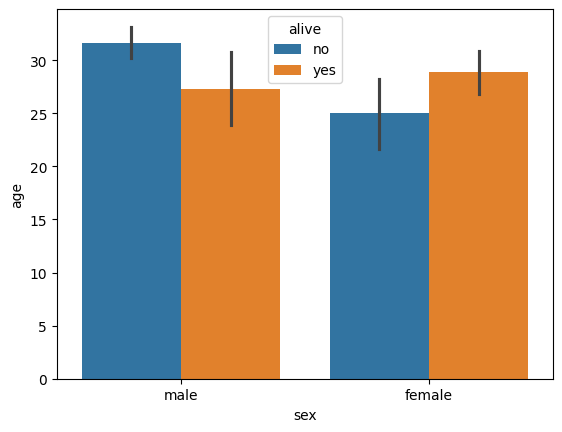

In [5]:
ax = sns.barplot(data=titanic, x='sex', y='age', hue='alive')

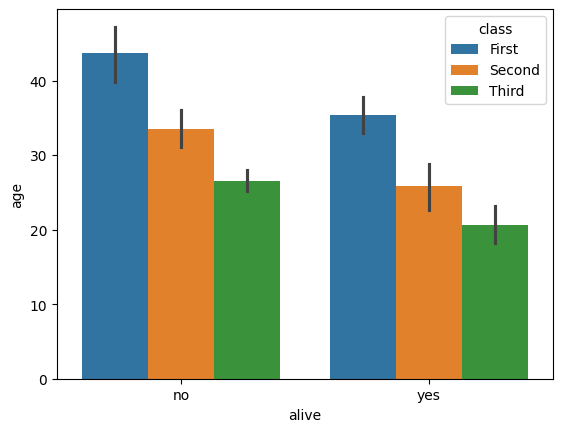

In [6]:
ax = sns.barplot(data=titanic, x='alive', y='age', hue='class')

In [7]:
vc = titanic.value_counts('pclass')
vc

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [8]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
sns.boxplot(penguins.bill_length_mm, penguins.species)

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
vc = penguins.value_counts('species')
print(vc)
sns.barplot(x=vc, y=vc.index)

In [ ]:
vc = titanic.value_counts('class')
vc

In [ ]:
sns.barplot(x=vc.index, y=vc, orient='v')

In [ ]:
mpg

In [ ]:
sns.countplot(data=mpg, x='cylinders')

In [ ]:
import mpld3
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
sns.relplot(data=mpg, x='horsepower', y='weight', hue='cylinders', size='displacement')
plt.xlim(25, 350)

In [ ]:
mpg['make'] = mpg['name'].str.split().apply(lambda e: e[0])
data = ((make, data['mpg'].mean(), data['horsepower'].mean()) for make, data in mpg.groupby('make'))  # generator
df = pd.DataFrame(data, columns='make mpg horsepower'.split())
sns.scatterplot(data=df, x='mpg', y='horsepower')

In [ ]:
data = ((year, data['mpg'].mean(), data['horsepower'].mean()) for year, data in mpg.groupby('model_year'))  # generator
df = pd.DataFrame(data, columns='year mpg horsepower'.split())
df['year'] += 1900
df

In [ ]:
sns.lineplot(data=df, x='year', y='mpg')

In [ ]:
sns.distplot(mpg.mpg, bins=8)

In [ ]:
sns.lmplot(data=df, x='year', y='mpg')

In [ ]:
penguins

In [ ]:
sns.boxplot(data=penguins, y="body_mass_g", x="species")

In [ ]:
sns.violinplot(data=penguins, y="body_mass_g", x="species")

In [ ]:
titanic

In [ ]:
titanic.groupby('sex')

In [ ]:
titanic.groupby('sex').count().sort_values(by="sex").sort_values(by="deck", ascending=False)